## **Notebook to Demonstrate Sampling Capabilities**

In [21]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import sys
sys.path.append('../../')
import numpy as np

from probabilistic.capabilities.uncertainty_definitions import (NormalDistribution, UniformDistribution, LognormalDistribution, 
                                                                TruncatedNormalDistribution, DeterministicCharacterization, 
                                                                TruncatedLognormalDistribution)
from probabilistic.capabilities.sampling import RandomStudy, LHSStudy
from probabilistic.capabilities.plotting import plot_sample_histogram, plot_distribution_pdf, plot_scatter_matrix

#### Create Example Distributions

In [23]:
study_parameters = {}
study_parameters['parameter_1'] = NormalDistribution(name='parameter 1',
                                                     uncertainty_type='aleatory',
                                                     nominal_value=5,
                                                     mean=5,
                                                     std_deviation=1)

study_parameters['parameter_2'] = TruncatedNormalDistribution(name='parameter 2',
                                                              uncertainty_type='epistemic',
                                                              nominal_value=5,
                                                              mean=5,
                                                              std_deviation=1,
                                                              lower_bound=3,
                                                              upper_bound=7)

study_parameters['parameter_3'] = LognormalDistribution(name='parameter 3',
                                                        uncertainty_type='epistemic',
                                                        nominal_value=1,
                                                        mu=-.3,
                                                        sigma=.3)

study_parameters['parameter_4'] = TruncatedLognormalDistribution(name='parameter 4',
                                                              uncertainty_type='aleatory',
                                                              nominal_value=1,
                                                              mu=-.3,
                                                              sigma=.3,
                                                              lower_bound=0.4,
                                                              upper_bound=1.2)

study_parameters['parameter_5'] = UniformDistribution(name='parameter 5',
                                                      uncertainty_type='aleatory',
                                                      nominal_value=2,
                                                      lower_bound=0,
                                                      upper_bound=5)

study_parameters['deterministic_1'] = DeterministicCharacterization(name='deterministic 1',
                                                                    value=5)

#### Generate Plots of Parameter's PDF

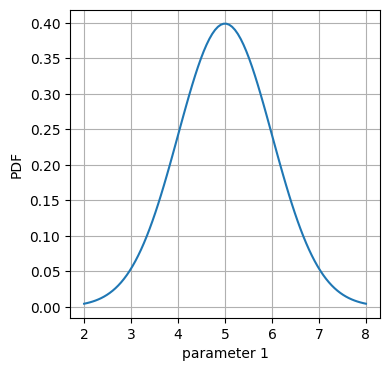

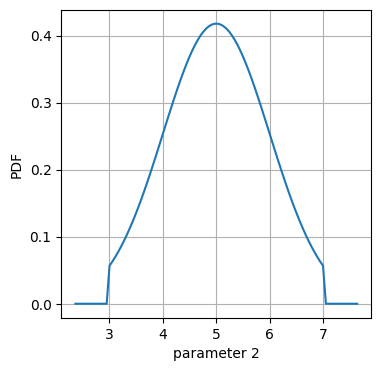

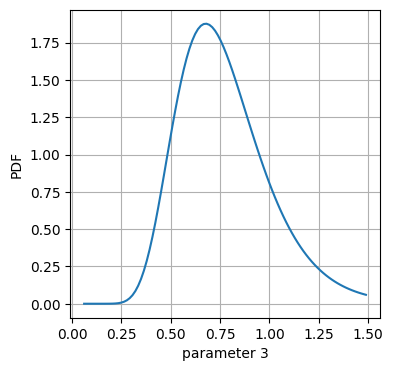

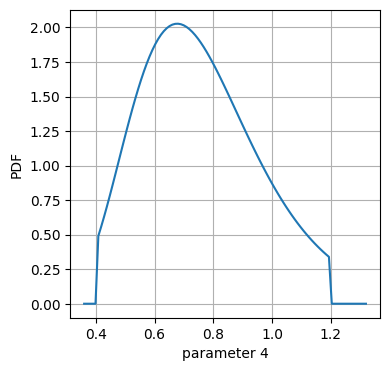

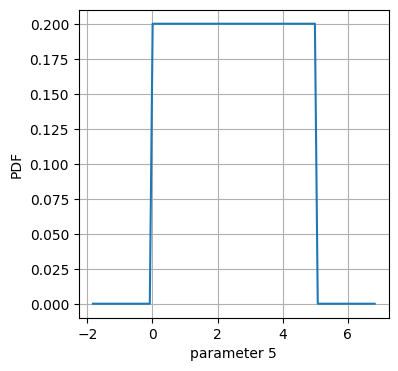

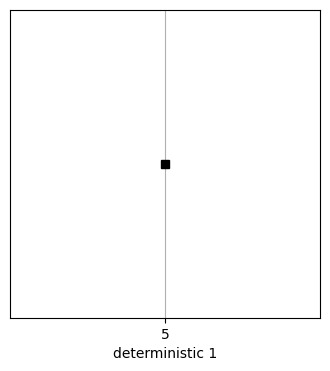

In [24]:
for name, parameter in study_parameters.items():
    parameter.plot_distribution()

#### Generate Histogram Plots of Parameter Samples

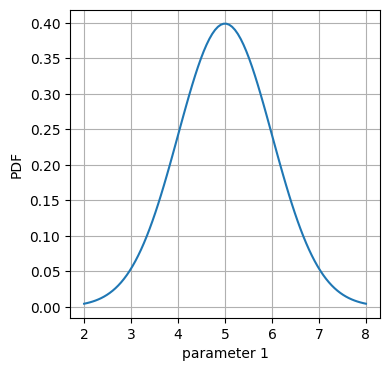

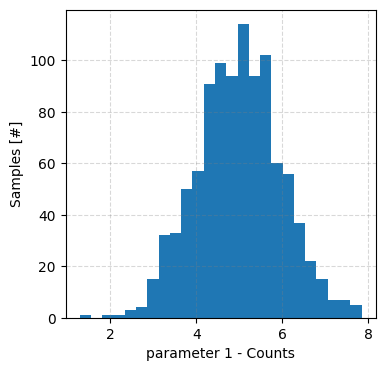

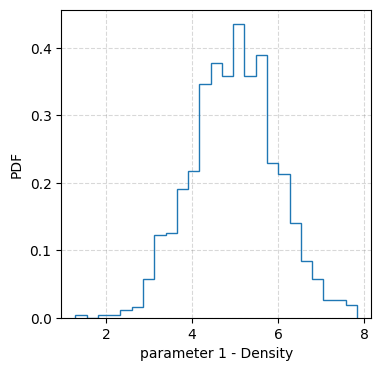

In [25]:
samples_parameter_1 = study_parameters['parameter_1'].generate_samples(sample_size=1_000)

study_parameters['parameter_1'].plot_distribution()

plot_sample_histogram(samples_parameter_1,
                      'parameter 1 - Counts')

plot_sample_histogram(samples_parameter_1,
                      'parameter 1 - Density',
                      density=True,
                      histtype='step')

#### Demonstrate Different Types of Parameter Sampling

In [26]:
mc_study = RandomStudy(number_of_aleatory_samples=100,
                       number_of_epistemic_samples=7,
                       random_state=np.random.default_rng())
mc_study.add_variables(study_parameters)
mc_samples = mc_study.create_variable_sample_sheet()

lhs_study = LHSStudy(number_of_aleatory_samples=100,
                     number_of_epistemic_samples=7,
                     random_state=np.random.default_rng())
lhs_study.add_variables(study_parameters)
lhs_samples = lhs_study.create_variable_sample_sheet()

#### Make A Scatter Plot of Monte Carlo Samples

/Users/bbschro/anaconda3/envs/helpr_dev/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/bbschro/anaconda3/envs/helpr_dev/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/bbschro/anaconda3/envs/helpr_dev/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


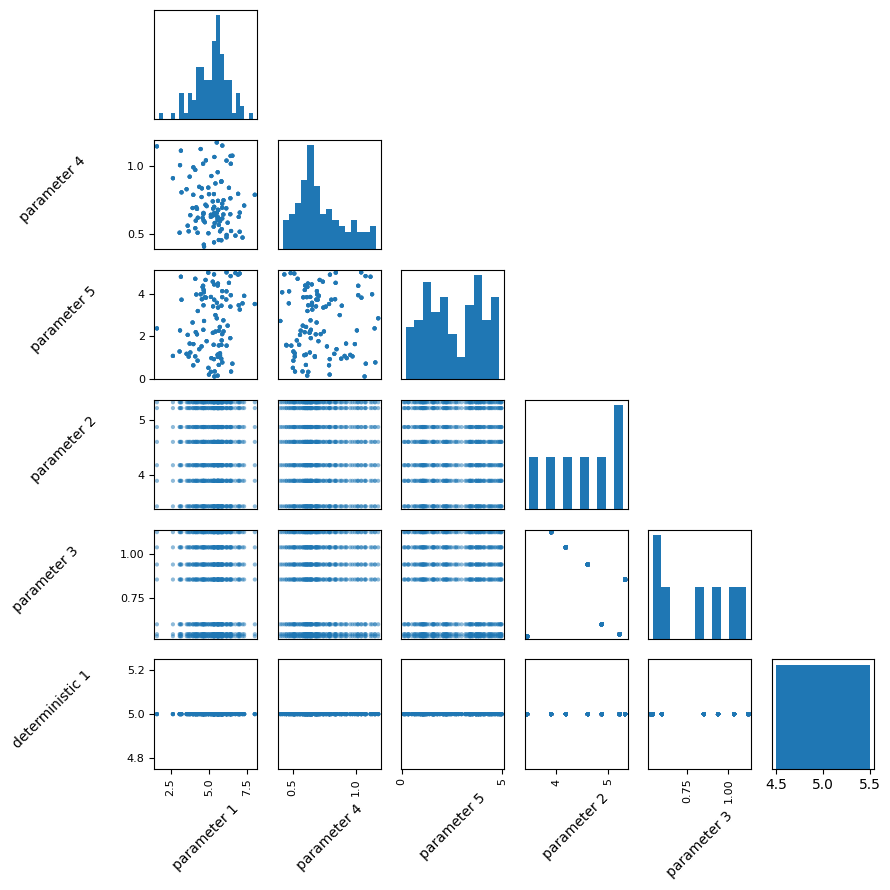

In [27]:
plot_scatter_matrix(mc_samples)

#### Make A Scatter Plot of LHS Samples

/Users/bbschro/anaconda3/envs/helpr_dev/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/Users/bbschro/anaconda3/envs/helpr_dev/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/Users/bbschro/anaconda3/envs/helpr_dev/lib/python3.11/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


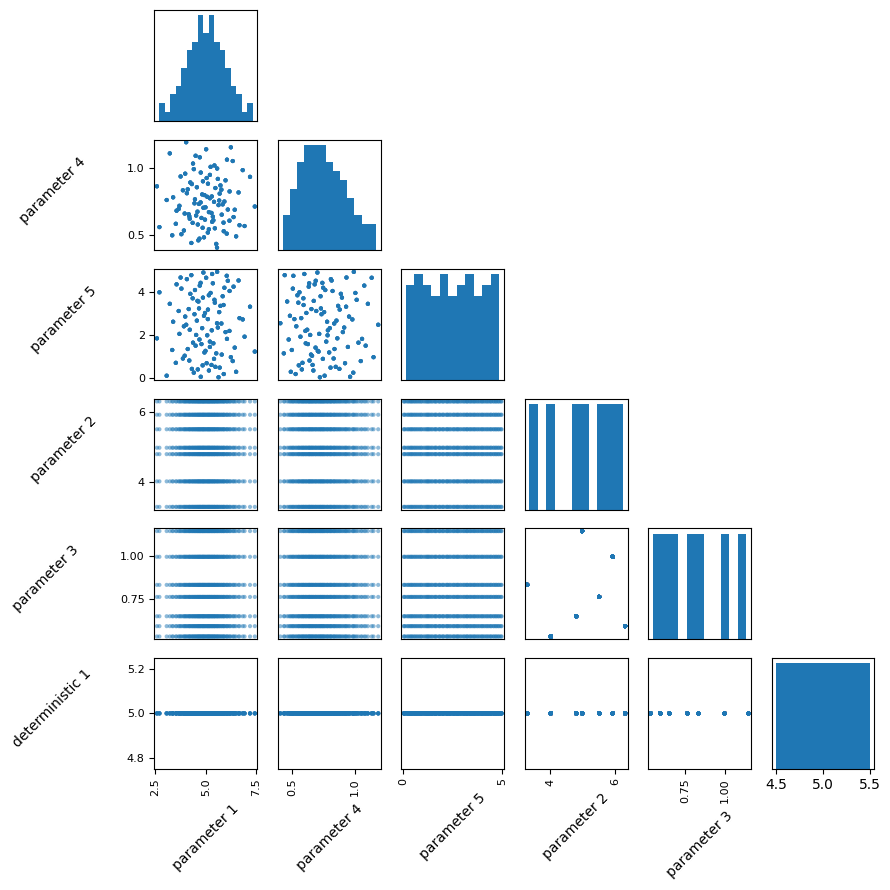

In [28]:
plot_scatter_matrix(lhs_samples)

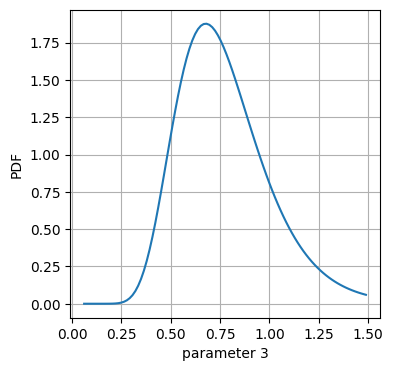

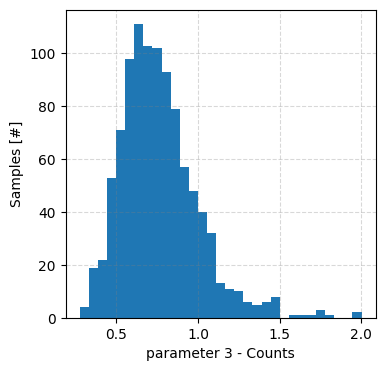

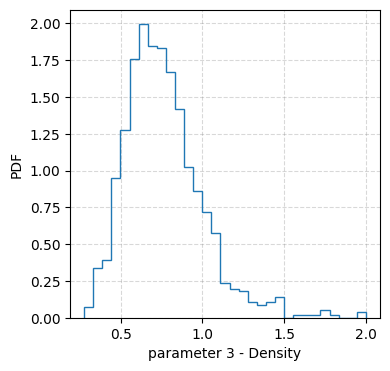

In [29]:
samples_parameter_3 = study_parameters['parameter_3'].generate_samples(sample_size=1_000)

study_parameters['parameter_3'].plot_distribution()

plot_sample_histogram(samples_parameter_3,
                      'parameter 3 - Counts')

plot_sample_histogram(samples_parameter_3,
                      'parameter 3 - Density',
                      density=True,
                      histtype='step')